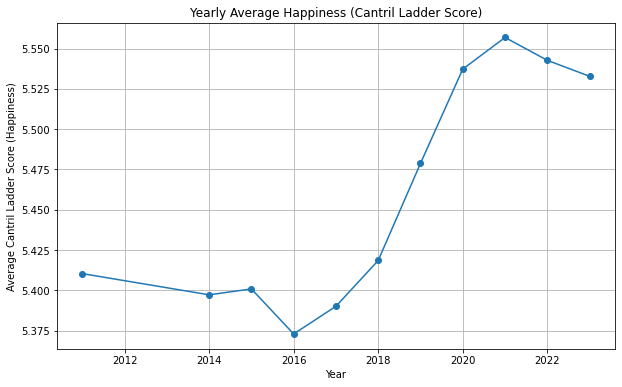

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
 
# Load your Happiness CSV file into a DataFrame
df = pd.read_csv('happiness.csv')
 
# Group by 'Year' and calculate the mean of the 'Cantril ladder score'
yearly_happiness_average = df.groupby('Year')['Cantril ladder score'].mean()
 
# Reset the index to make it a DataFrame again
yearly_happiness_average_df = yearly_happiness_average.reset_index()
 
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_happiness_average_df['Year'], yearly_happiness_average_df['Cantril ladder score'], marker='o')
 
# Customize the plot
plt.xlabel('Year')
plt.ylabel('Average Cantril Ladder Score (Happiness)')
plt.title('Yearly Average Happiness (Cantril Ladder Score)')
plt.grid(True)
 
# Show the plot
plt.show()



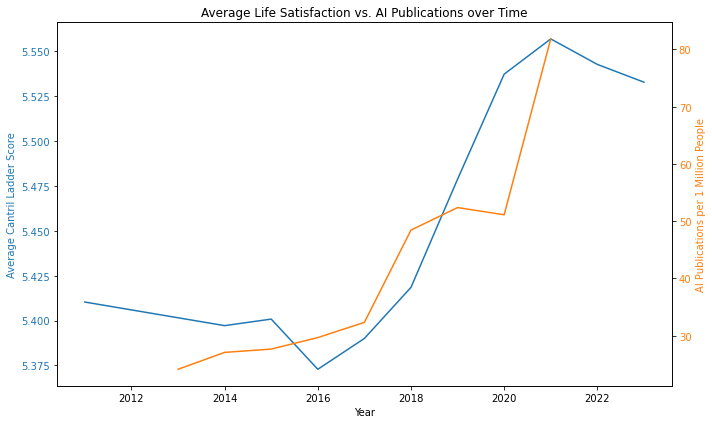

In [5]:
# Function to load datasets

def load_data(happiness_path, ai_path):

    happiness_df = pd.read_csv(happiness_path)

    ai_df = pd.read_csv(ai_path)

    return happiness_df, ai_df
 
# Function to process and calculate averages by year

def calculate_averages(happiness_df, ai_df):

    happiness_avg = happiness_df.groupby('Year')['Cantril ladder score'].mean()

    ai_avg = ai_df.groupby('Year')['Number of articles per 1 million people - Field: All'].mean()

    return happiness_avg, ai_avg
 
# Function to plot trends

def plot_trends(happiness_avg, ai_avg):

    fig, ax1 = plt.subplots(figsize=(10,6))
 
    # Plot life satisfaction trend

    color = 'tab:blue'

    ax1.set_xlabel('Year')

    ax1.set_ylabel('Average Cantril Ladder Score', color=color)

    ax1.plot(happiness_avg.index, happiness_avg.values, color=color, label='Life Satisfaction')

    ax1.tick_params(axis='y', labelcolor=color)
 
    # Plot AI publications trend

    ax2 = ax1.twinx()

    color = 'tab:orange'

    ax2.set_ylabel('AI Publications per 1 Million People', color=color)

    ax2.plot(ai_avg.index, ai_avg.values, color=color, label='AI Publications')

    ax2.tick_params(axis='y', labelcolor=color)
 
    plt.title('Average Life Satisfaction vs. AI Publications over Time')

    fig.tight_layout()

    plt.show()
 
# Main function to run the analysis

def main():

    happiness_df, ai_df = load_data('happiness.csv', 'ai.csv')

    happiness_avg, ai_avg = calculate_averages(happiness_df, ai_df)

    plot_trends(happiness_avg, ai_avg)
 
# Run the main function

main()
 

    Entity Code_x  Year  Cantril ladder score Code_y  \
0  Denmark    DNK  2014                7.5270    DNK   
1  Denmark    DNK  2015                7.5260    DNK   
2  Denmark    DNK  2016                7.5220    DNK   
3  Denmark    DNK  2017                7.5553    DNK   
4  Denmark    DNK  2018                7.6001    DNK   

   AI Publications per 1M People  
0                       77.25301  
1                       86.03554  
2                       94.44506  
3                      102.16528  
4                      123.40725  


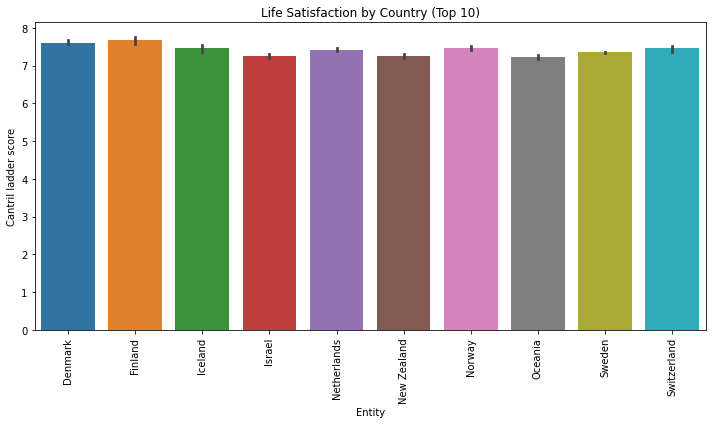

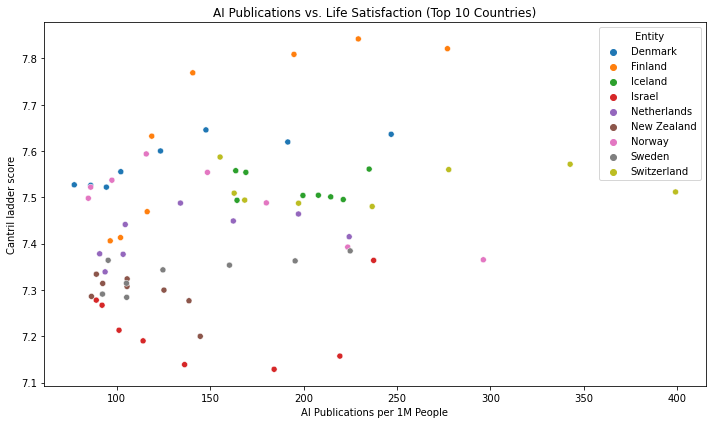

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# Load your Happiness CSV file and AI CSV file into DataFrames
df1 = pd.read_csv('happiness.csv')
df2 = pd.read_csv('ai.csv')
 
# Rename the AI publications column to a more manageable name in df2
df2.rename(columns={'Number of articles per 1 million people - Field: All': 'AI Publications per 1M People'}, inplace=True)
 
# Sort df1 by 'Cantril ladder score' to get the top 10 countries by life satisfaction
# Ensure the 'Cantril ladder score' is numeric and group by 'Entity' to get the top 10 countries
top10_countries = df1.groupby('Entity')['Cantril ladder score'].mean().sort_values(ascending=False).head(10).index
 
# Filter the happiness and AI datasets for only the top 10 countries
df1_top10 = df1[df1['Entity'].isin(top10_countries)]
df2_top10 = df2[df2['Entity'].isin(top10_countries)]
 
# Merge the filtered dataframes on both 'Entity' and 'Year' to ensure accurate merging
merged_df_top10 = pd.merge(df1_top10, df2_top10, on=['Entity', 'Year'])
 
# View the merged dataset
print(merged_df_top10.head())
 
# Plot life satisfaction by country for the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Entity', y='Cantril ladder score', data=df1_top10)
plt.xticks(rotation=90)
plt.title('Life Satisfaction by Country (Top 10)')
plt.tight_layout()  # Ensures everything fits within the figure
plt.show()
 
# Plot AI publications vs. Life Satisfaction using the merged top 10 countries dataframe
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI Publications per 1M People', y='Cantril ladder score', data=merged_df_top10, hue='Entity')
plt.title('AI Publications vs. Life Satisfaction (Top 10 Countries)')
plt.tight_layout()  # Ensures everything fits within the figure
plt.show()
